In [8]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout

In [2]:
df = pd.read_csv('diabetes.csv')
df.corr().sort_values(by = 'Outcome', ascending = False)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068


<IPython.core.display.Javascript object>


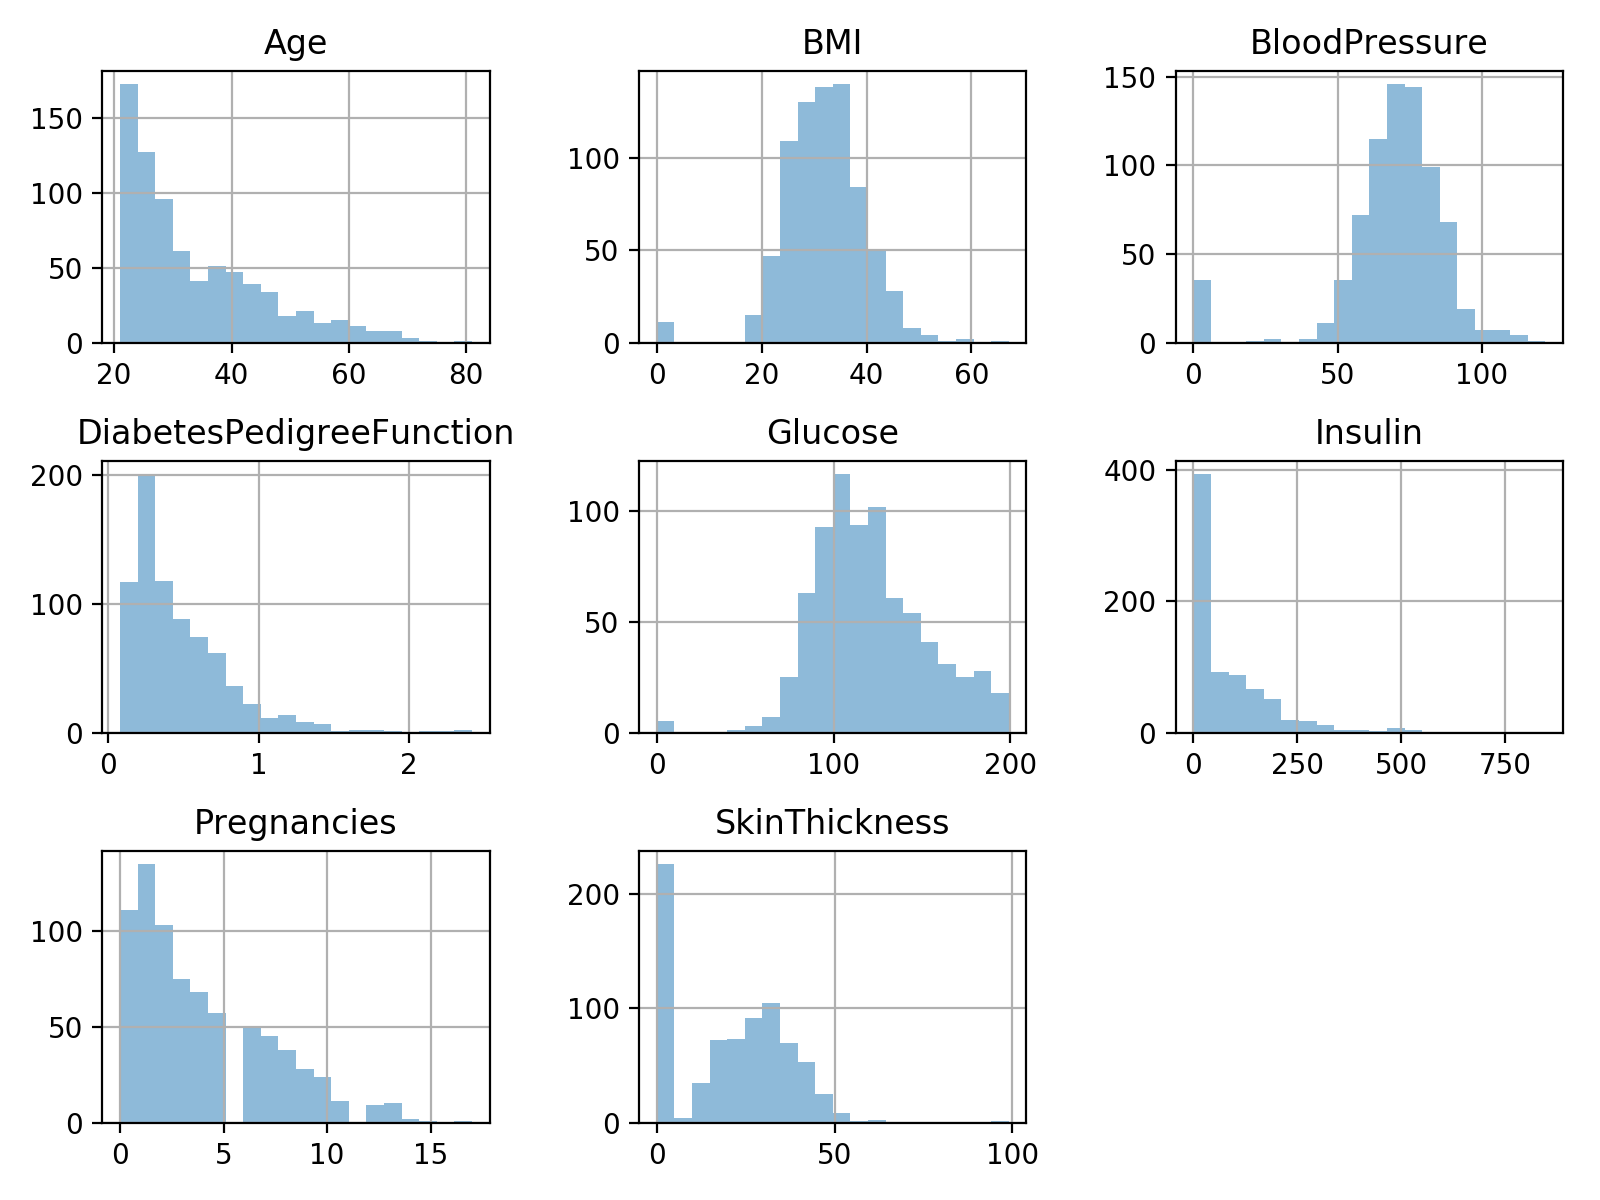

In [3]:
%matplotlib notebook
X = df.iloc[:, 0:8]
y = df.iloc[:, 8]
X.hist(figsize = (8, 6), bins = 20, alpha = 0.5)
plt.tight_layout()

<IPython.core.display.Javascript object>


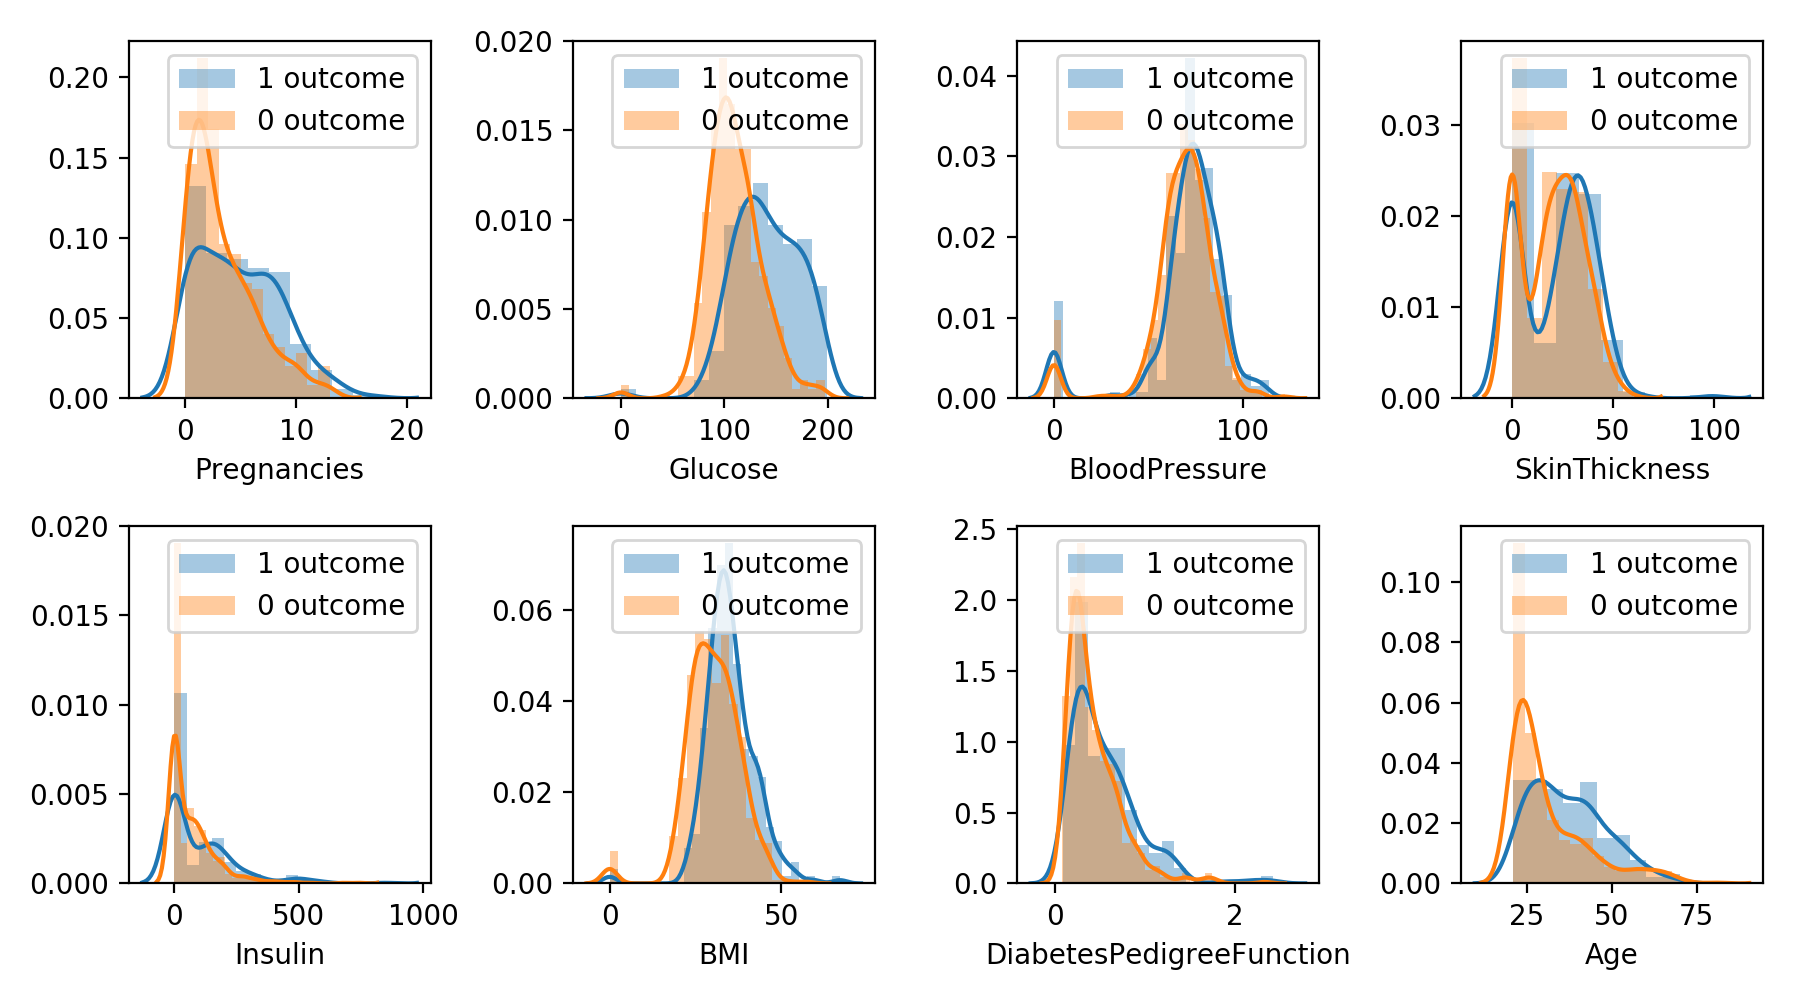

In [4]:
%matplotlib notebook
X_1 = df[df['Outcome'] == 1]
X_0 = df[df['Outcome'] == 0]
X_1, X_0 = X_1.iloc[:, 0:8], X_0.iloc[:, 0:8]
f, subax = plt.subplots(2, 4, figsize = (9, 5))
subaxes = [subax[i, j] for i in range(0,2) for j in range(0, 4)]

for col, ax in zip(range(0,X_1.shape[1]), subaxes):
    sns.distplot(X_1.iloc[:, col], ax = ax, label = '1 outcome')
    sns.distplot(X_0.iloc[:, col], ax = ax, label = '0 outcome')
    ax.legend()
    
plt.tight_layout()

In [5]:
g = sns.pairplot(df, hue='Outcome', diag_kind='kde')
g.add_legend()

<IPython.core.display.Javascript object>

In [5]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

/Users/rtavakoli20/miniconda3/envs/venv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### Build the Model, Sequential

In [6]:
model = Sequential()
model.add(Dense(8, input_dim = 8, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

### Fit and Compile the Model

In [13]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_scaled, y, epochs = 400, batch_size = 12, validation_split = 0.1)

Train on 691 samples, validate on 77 samples
Epoch 1/400
691/691 [==============================]691/691 [==============================] - 0s 471us/step - loss: 0.3515 - acc: 0.8278 - val_loss: 0.6581 - val_acc: 0.7792

Epoch 2/400
691/691 [==============================]691/691 [==============================] - 0s 154us/step - loss: 0.3379 - acc: 0.8509 - val_loss: 0.6431 - val_acc: 0.8052

Epoch 3/400
691/691 [==============================]691/691 [==============================] - 0s 157us/step - loss: 0.3368 - acc: 0.8466 - val_loss: 0.6242 - val_acc: 0.8052

Epoch 4/400
691/691 [==============================]691/691 [==============================] - 0s 165us/step - loss: 0.3362 - acc: 0.8538 - val_loss: 0.6394 - val_acc: 0.8052

Epoch 5/400
691/691 [==============================]691/691 [==============================] - 0s 291us/step - loss: 0.3335 - acc: 0.8567 - val_loss: 0.6276 - val_acc: 0.7792

Epoch 6/400
691/691 [==============================]691/691 [==============

691/691 [==============================]691/691 [==============================] - 0s 110us/step - loss: 0.3346 - acc: 0.8480 - val_loss: 0.6224 - val_acc: 0.8052

Epoch 48/400
691/691 [==============================]691/691 [==============================] - 0s 115us/step - loss: 0.3382 - acc: 0.8567 - val_loss: 0.6341 - val_acc: 0.7792

Epoch 49/400
691/691 [==============================]691/691 [==============================] - 0s 110us/step - loss: 0.3379 - acc: 0.8437 - val_loss: 0.6276 - val_acc: 0.8052

Epoch 50/400
691/691 [==============================]691/691 [==============================] - 0s 113us/step - loss: 0.3364 - acc: 0.8640 - val_loss: 0.6271 - val_acc: 0.7922

Epoch 51/400
691/691 [==============================]691/691 [==============================] - 0s 166us/step - loss: 0.3322 - acc: 0.8567 - val_loss: 0.6220 - val_acc: 0.8312

Epoch 52/400
691/691 [==============================]691/691 [==============================] - 0s 176us/step - loss: 0.3320 - a

691/691 [==============================]691/691 [==============================] - 0s 181us/step - loss: 0.3341 - acc: 0.8596 - val_loss: 0.6223 - val_acc: 0.7922

Epoch 94/400
691/691 [==============================]691/691 [==============================] - 0s 189us/step - loss: 0.3304 - acc: 0.8509 - val_loss: 0.6464 - val_acc: 0.7792

Epoch 95/400
691/691 [==============================]691/691 [==============================] - 0s 179us/step - loss: 0.3342 - acc: 0.8423 - val_loss: 0.6302 - val_acc: 0.8052

Epoch 96/400
691/691 [==============================]691/691 [==============================] - 0s 190us/step - loss: 0.3295 - acc: 0.8480 - val_loss: 0.6301 - val_acc: 0.7922

Epoch 97/400
691/691 [==============================]691/691 [==============================] - 0s 185us/step - loss: 0.3294 - acc: 0.8625 - val_loss: 0.6300 - val_acc: 0.8182

Epoch 98/400
691/691 [==============================]691/691 [==============================] - 0s 181us/step - loss: 0.3303 - a

691/691 [==============================]691/691 [==============================] - 0s 170us/step - loss: 0.3275 - acc: 0.8654 - val_loss: 0.6301 - val_acc: 0.7922

Epoch 140/400
691/691 [==============================]691/691 [==============================] - 0s 178us/step - loss: 0.3260 - acc: 0.8567 - val_loss: 0.6227 - val_acc: 0.7922

Epoch 141/400
691/691 [==============================]691/691 [==============================] - 0s 167us/step - loss: 0.3255 - acc: 0.8567 - val_loss: 0.6248 - val_acc: 0.8182

Epoch 142/400
691/691 [==============================]691/691 [==============================] - 0s 169us/step - loss: 0.3290 - acc: 0.8582 - val_loss: 0.6189 - val_acc: 0.8052

Epoch 143/400
691/691 [==============================]691/691 [==============================] - 0s 167us/step - loss: 0.3279 - acc: 0.8582 - val_loss: 0.6366 - val_acc: 0.7922

Epoch 144/400
691/691 [==============================]691/691 [==============================] - 0s 182us/step - loss: 0.328

691/691 [==============================]691/691 [==============================] - 0s 155us/step - loss: 0.3244 - acc: 0.8553 - val_loss: 0.6130 - val_acc: 0.7922

Epoch 186/400
691/691 [==============================]691/691 [==============================] - 0s 156us/step - loss: 0.3269 - acc: 0.8640 - val_loss: 0.6176 - val_acc: 0.7922

Epoch 187/400
691/691 [==============================]691/691 [==============================] - 0s 142us/step - loss: 0.3265 - acc: 0.8654 - val_loss: 0.6126 - val_acc: 0.8182

Epoch 188/400
691/691 [==============================]691/691 [==============================] - 0s 129us/step - loss: 0.3281 - acc: 0.8625 - val_loss: 0.6137 - val_acc: 0.7922

Epoch 189/400
691/691 [==============================]691/691 [==============================] - 0s 131us/step - loss: 0.3250 - acc: 0.8553 - val_loss: 0.6266 - val_acc: 0.7922

Epoch 190/400
691/691 [==============================]691/691 [==============================] - 0s 151us/step - loss: 0.327

691/691 [==============================]691/691 [==============================] - 0s 127us/step - loss: 0.3242 - acc: 0.8553 - val_loss: 0.6493 - val_acc: 0.7792

Epoch 232/400
691/691 [==============================]691/691 [==============================] - 0s 127us/step - loss: 0.3233 - acc: 0.8553 - val_loss: 0.6475 - val_acc: 0.7792

Epoch 233/400
691/691 [==============================]691/691 [==============================] - 0s 125us/step - loss: 0.3225 - acc: 0.8596 - val_loss: 0.6317 - val_acc: 0.7922

Epoch 234/400
691/691 [==============================]691/691 [==============================] - 0s 120us/step - loss: 0.3261 - acc: 0.8553 - val_loss: 0.6245 - val_acc: 0.7922

Epoch 235/400
691/691 [==============================]691/691 [==============================] - 0s 118us/step - loss: 0.3291 - acc: 0.8538 - val_loss: 0.6261 - val_acc: 0.7922

Epoch 236/400
691/691 [==============================]691/691 [==============================] - 0s 116us/step - loss: 0.325

691/691 [==============================]691/691 [==============================] - 0s 121us/step - loss: 0.3215 - acc: 0.8654 - val_loss: 0.6223 - val_acc: 0.8052

Epoch 278/400
691/691 [==============================]691/691 [==============================] - 0s 120us/step - loss: 0.3191 - acc: 0.8698 - val_loss: 0.6305 - val_acc: 0.8052

Epoch 279/400
691/691 [==============================]691/691 [==============================] - 0s 109us/step - loss: 0.3343 - acc: 0.8466 - val_loss: 0.6418 - val_acc: 0.8182

Epoch 280/400
691/691 [==============================]691/691 [==============================] - 0s 108us/step - loss: 0.3205 - acc: 0.8726 - val_loss: 0.6445 - val_acc: 0.7792

Epoch 281/400
691/691 [==============================]691/691 [==============================] - 0s 115us/step - loss: 0.3227 - acc: 0.8640 - val_loss: 0.6509 - val_acc: 0.7662

Epoch 282/400
691/691 [==============================]691/691 [==============================] - 0s 124us/step - loss: 0.319

691/691 [==============================]691/691 [==============================] - 0s 232us/step - loss: 0.3155 - acc: 0.8611 - val_loss: 0.6247 - val_acc: 0.8052

Epoch 324/400
691/691 [==============================]691/691 [==============================] - 0s 304us/step - loss: 0.3210 - acc: 0.8524 - val_loss: 0.6396 - val_acc: 0.7922

Epoch 325/400
691/691 [==============================]691/691 [==============================] - 0s 180us/step - loss: 0.3203 - acc: 0.8582 - val_loss: 0.6367 - val_acc: 0.7922

Epoch 326/400
691/691 [==============================]691/691 [==============================] - 0s 163us/step - loss: 0.3231 - acc: 0.8582 - val_loss: 0.6430 - val_acc: 0.8052

Epoch 327/400
691/691 [==============================]691/691 [==============================] - 0s 175us/step - loss: 0.3184 - acc: 0.8640 - val_loss: 0.6345 - val_acc: 0.7922

Epoch 328/400
691/691 [==============================]691/691 [==============================] - 0s 177us/step - loss: 0.316

691/691 [==============================]691/691 [==============================] - 0s 361us/step - loss: 0.3188 - acc: 0.8582 - val_loss: 0.6352 - val_acc: 0.7922

Epoch 370/400
691/691 [==============================]691/691 [==============================] - 0s 231us/step - loss: 0.3144 - acc: 0.8582 - val_loss: 0.6462 - val_acc: 0.8052

Epoch 371/400
691/691 [==============================]691/691 [==============================] - 0s 197us/step - loss: 0.3191 - acc: 0.8669 - val_loss: 0.6536 - val_acc: 0.7662

Epoch 372/400
691/691 [==============================]691/691 [==============================] - 0s 300us/step - loss: 0.3213 - acc: 0.8755 - val_loss: 0.6415 - val_acc: 0.8052

Epoch 373/400
691/691 [==============================]691/691 [==============================] - 0s 172us/step - loss: 0.3193 - acc: 0.8625 - val_loss: 0.6344 - val_acc: 0.7922

Epoch 374/400
691/691 [==============================]691/691 [==============================] - 0s 220us/step - loss: 0.314

In [15]:
# 80% accuracy score on data and validation data